In [2]:
import yfinance as yf 
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [3]:
all_manufacture = ['NSANY', 'HMC', 'TM', 'HYMTF', 'MZDAY','VWAGY', 'BAMXF', 'DMLRY', 'POAHY', 'VLVLY','GM', 'F', 'FCAU', 'TSLA']

# Set Range we want to records from. 
start = datetime.date(2019,12,2) 
end = datetime.date(2020,12,3)

adj_close = yf.download(all_manufacture, start, end)['Adj Close']
daily_return = adj_close.pct_change()
daily_return.info()

[*********************100%***********************]  14 of 14 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-02 to 2020-12-02
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAMXF   253 non-null    float64
 1   DMLRY   253 non-null    float64
 2   F       253 non-null    float64
 3   FCAU    253 non-null    float64
 4   GM      253 non-null    float64
 5   HMC     253 non-null    float64
 6   HYMTF   253 non-null    float64
 7   MZDAY   253 non-null    float64
 8   NSANY   253 non-null    float64
 9   POAHY   253 non-null    float64
 10  TM      253 non-null    float64
 11  TSLA    253 non-null    float64
 12  VLVLY   253 non-null    float64
 13  VWAGY   253 non-null    float64
dtypes: float64(14)
memory usage: 29.8 KB


In [4]:
adj_close.head()

,BAMXF,DMLRY,F,FCAU,GM,HMC,HYMTF,MZDAY,NSANY,POAHY,TM,TSLA,VLVLY,VWAGY
Date,,,,,,,,,,,,,,
2019-12-02,74.813637,12.972068,8.859331,13.449130,35.071316,27.405268,30.700001,4.218997,12.40,6.569314,137.817032,66.973999,14.804649,18.490610
2019-12-03,74.718941,12.896813,8.741339,13.467392,34.729202,27.434559,30.700001,4.131907,12.31,6.560401,138.268982,67.239998,14.694275,18.635822
2019-12-04,75.618591,12.877998,8.800335,13.339565,34.993114,27.844614,30.500000,4.160937,12.37,6.587142,140.872650,66.606003,14.780655,18.539013
2019-12-05,75.429192,12.840371,8.780669,13.494782,34.884445,27.991060,30.500000,4.151260,12.40,6.587142,140.332260,66.073997,14.564704,18.684227
2019-12-06,77.351616,12.812151,8.869164,13.357826,35.111671,28.323009,30.500000,4.209320,12.44,6.604969,140.273315,67.178001,14.655884,18.800400


In [5]:
#add list of column names for dataframe

daily_return.tail()

,BAMXF,DMLRY,F,FCAU,GM,HMC,HYMTF,MZDAY,NSANY,POAHY,TM,TSLA,VLVLY,VWAGY
Date,,,,,,,,,,,,,,
2020-11-25,0.001107,-0.005821,-0.039153,0.007663,-0.021524,-0.012782,0.002604,-0.006289,0.057143,-0.015919,-0.017589,0.033527,-0.006313,-0.014615
2020-11-27,0.000000,-0.013466,0.001101,0.002535,-0.008799,-0.020443,0.005195,-0.015823,-0.034749,-0.041177,-0.008138,0.020488,-0.008895,-0.023446
2020-11-30,-0.032633,-0.002374,-0.001100,-0.020228,-0.027075,-0.035826,-0.005168,-0.057878,-0.058000,-0.030675,-0.040668,-0.031003,-0.036325,-0.031315
2020-12-01,0.026758,0.027365,0.017621,0.032903,0.019161,0.023088,0.000000,0.030717,0.031847,0.050633,0.012494,0.030233,0.031486,0.050108
2020-12-02,0.005457,0.003474,-0.004329,-0.002498,-0.002238,0.027151,0.033766,0.000000,0.013374,0.001506,0.001469,-0.027259,-0.012984,-0.001026


In [13]:
clean_returns = daily_return.dropna()
type(clean_returns)

pandas.core.frame.DataFrame

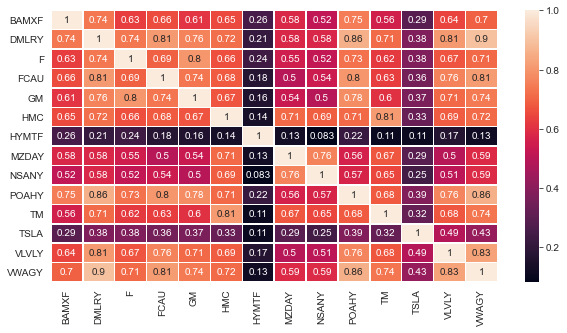

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(clean_returns.corr(), annot = True, linewidth = 0.5)

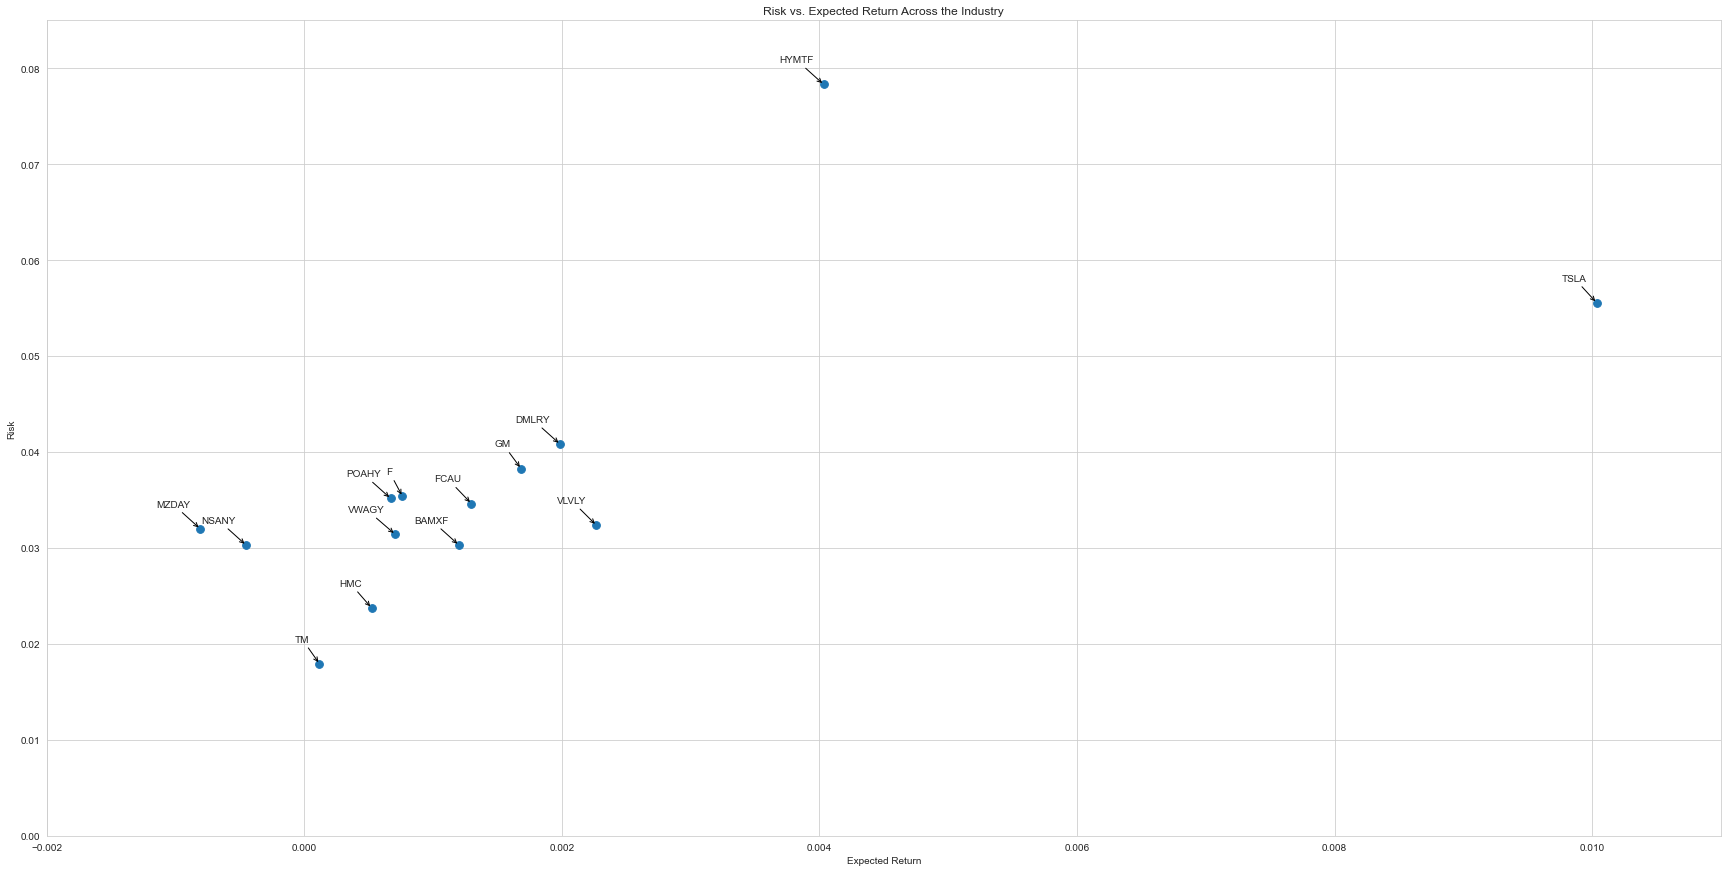

In [16]:
clean_returns = daily_return.dropna()
plt.figure(figsize=(30,15))

plt.scatter(clean_returns.mean(), clean_returns.std(),s=60)


plt.title('Risk vs. Expected Return Across the Industry')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim(-0.002,.011)
plt.ylim(0,0.085)

for label, x, y in zip(clean_returns.columns, clean_returns.mean(), clean_returns.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', color = 'k', connectionstyle="arc3,rad=0"))

plt.show()
  